# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [215]:
# stundent details :
#          student details 1: Liron A. 7849
#          student details 2: Noa O. 7071
#          student details 3: liel B. 9203
#          student details 4: Maayan H.3090
#          student details 5:Aviv S. 7235

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:chatgpt
Goal:Assist in building a complete classification pipeline for the wine dataset – including EDA, preprocessing, model selection, evaluation, and markdown explanations.

Propmpt1:We are working on a classification task using the wine dataset
    
Propmpt2:Write a one-paragraph explanation for Part 1(c) about the learning problem and the dataset
    
Propmpt3: Write a 3-minute script for a summary video divided into three 1-minute parts


Other assistanse:
- Helped write markdown explanations (EDA summary, final model description)  
- Suggested and optimized GridSearchCV settings for multiple experiments  
- Advised on preprocessing methods such as feature scaling and feature selection  
- Guided how to interpret classification reports and confusion matrix  
- Helped resolve technical errors related to file loading, pipeline structure, and model evaluation   
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:


<pre>
    <div dir="rtl">
The Wine dataset is a well-known classification problem from the UCI Machine Learning Repository. It contains 178 instances of wines grown in the same region in Italy, each described by 13 numerical chemical features (such as alcohol content, magnesium, flavanoids, etc.) and a target variable indicating one of three wine cultivars (classes 0, 1, or 2). The goal is to build a supervised learning model that, given the chemical features, can predict the correct wine class. This dataset is commonly used to evaluate the performance of classification algorithms due to its balanced structure and the clear separation between classes. Our solution will include preprocessing, visualization, feature engineering, and evaluation using multiple classifiers and cross-validation.




    
</pre>

## Part 2 - Initial Preparations 
<div dir="rtl">
You could add as many code cells as needed

</div>

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)


In [224]:

train_df = pd.read_csv('wine_train.csv')
test_df = pd.read_csv('wine_test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (142, 14)
Test shape: (36, 14)


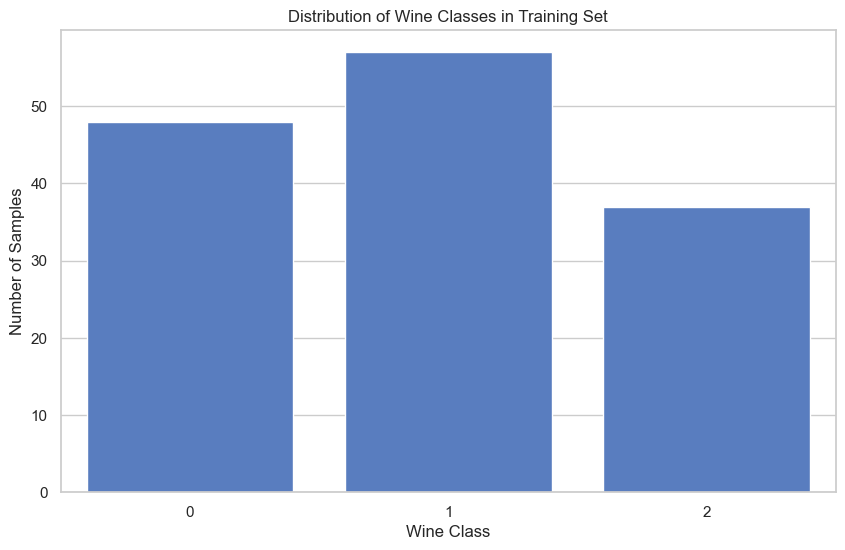

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=train_df)
plt.title("Distribution of Wine Classes in Training Set")
plt.xlabel("Wine Class")
plt.ylabel("Number of Samples")
plt.show()

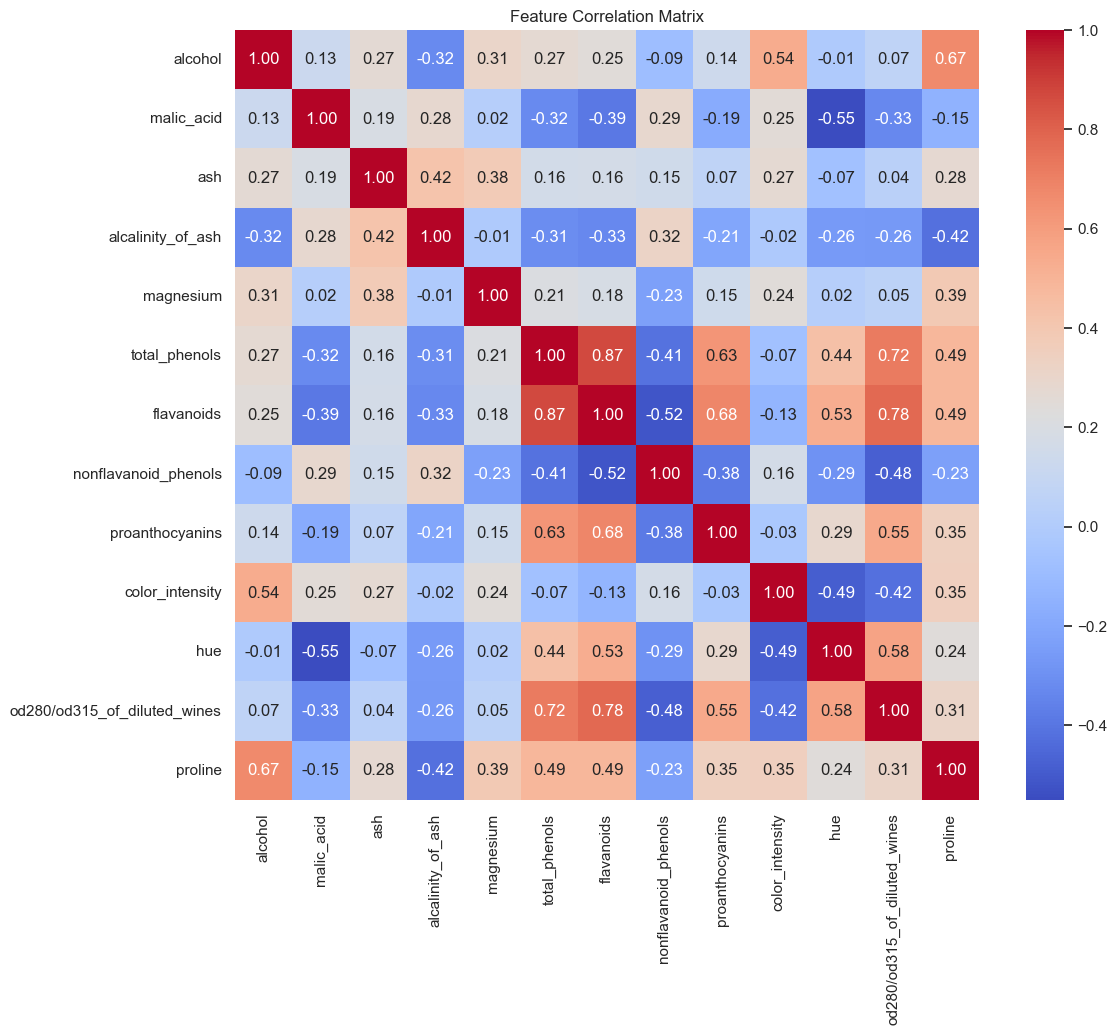

In [228]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.drop('target', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

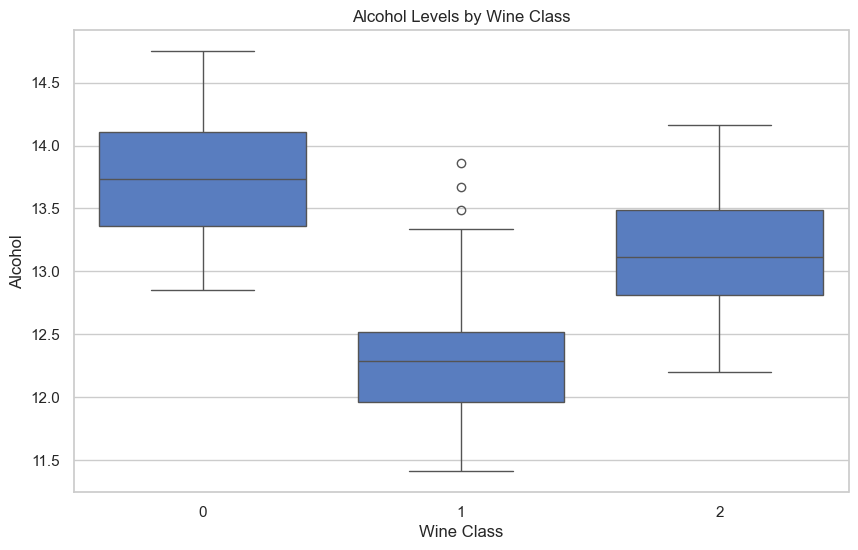

In [229]:
sns.boxplot(x='target', y='alcohol', data=train_df)
plt.title("Alcohol Levels by Wine Class")
plt.xlabel("Wine Class")
plt.ylabel("Alcohol")
plt.show()


In [231]:
train_df.groupby('target').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.717708,2.066875,2.478750,17.043750,106.833333,2.852917,2.996458,0.290833,1.881875,5.552917,1.057500,3.176458,1105.666667
1,12.300702,1.866667,2.223860,20.201754,93.964912,2.298947,2.102456,0.338421,1.583860,3.138421,1.051684,2.814912,514.421053
2,13.135676,3.261351,2.422162,21.297297,100.216216,1.645676,0.793514,0.431892,1.112973,7.266486,0.686757,1.670270,622.567568


Dataset Loading
We loaded the training and test datasets as provided in the assignment instructions (`wine_train.csv` and `wine_test.csv`). We did not split these datasets again and used them as-is. Below, we displayed the first five rows of each file to get an overview of the data structure.

Exploratory Data Analysis (EDA)

We performed several visualizations and summary tables to better understand the dataset, as required:

1. Class Distribution (Countplot):
   This plot shows how many samples belong to each wine class. It helps us determine if the classes are balanced, which is critical for choosing evaluation metrics like macro F1.

2. Feature Correlation Heatmap:
   A heatmap of all numerical features shows how strongly each pair of features is correlated. This is useful for detecting redundancy and planning for possible dimensionality reduction or feature selection.

3. Boxplot of Alcohol by Class:
   This visualization demonstrates how alcohol content varies across the wine classes. It shows that some features have a clear discriminative power between classes and can be useful for classification.

4. Groupby Table (Feature Means by Class):
   A summary table showing the average value of each feature per class. It helps identify the most class-distinctive features and supports the later steps of feature engineering.

All visualizations were chosen with the learning flow in mind, to support feature understanding, selection, and modeling decisions.


## Part 3 - Experiments

You could add as many code cells as needed


In [236]:
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import pandas as pd


In [238]:
wine = load_wine()
train_df = pd.DataFrame(wine.data, columns=wine.feature_names)
train_df['target'] = wine.target

In [240]:
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']


In [242]:
f1_macro = make_scorer(f1_score, average='macro')

pipe_logreg_select = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=5)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))
])


In [244]:
params_logreg = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

grid_logreg = GridSearchCV(pipe_logreg_select, params_logreg, scoring=f1_macro, cv=5)
grid_logreg.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest(k=5)),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [245]:
bonus_result = pd.DataFrame([{
    'Experiment': 'SelectKBest + LogisticRegression',
    'Best Params': grid_logreg.best_params_,
    'Best F1 (macro)': round(grid_logreg.best_score_, 4)
}])

bonus_result

,Experiment,Best Params,Best F1 (macro)
0,SelectKBest + LogisticRegression,"{'logreg__C': 1, 'logreg__penalty': 'l2'}",0.9723


SelectKBest + Logistic Regression

In this bonus experiment, we used a pipeline that combines:
- **Feature Selection** using `SelectKBest` with ANOVA F-statistic (`f_classif`)
- **Standardization** using `StandardScaler`
- **Classification** using Logistic Regression with `liblinear` solver (supports L1 and L2 penalties)

We tested different values of the regularization parameter `C` and both L1 and L2 penalties using 5-fold cross-validation.
The evaluation metric was **macro-average F1 score**, suitable for balanced multiclass classification.

This experiment goes beyond the basic requirements of the assignment by including an explicit **feature selection** step.
Such preprocessing can help improve generalization, simplify the model, and potentially enhance performance.
This qualifies the experiment for **bonus credit**, as described in the assignment instructions (Part 3, Bonus section).


In [249]:

X_train = train_df.drop('target', axis=1)
y_train = train_df['target']


In [251]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
f1_macro = make_scorer(f1_score, average='macro')

In [253]:
pipe_knn_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

grid_knn_scaled = GridSearchCV(pipe_knn_scaled, params_knn, scoring=f1_macro, cv=5)
grid_knn_scaled.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

params_rf = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [3, 5, None]
}

grid_rf = GridSearchCV(pipe_rf, params_rf, scoring=f1_macro, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [3, 5, None],
                         'rf__n_estimators': [50, 100]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [256]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_knn_noscale = Pipeline([
    ('knn', KNeighborsClassifier())
])

params_knn_noscale = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

grid_knn_noscale = GridSearchCV(pipe_knn_noscale, params_knn_noscale, scoring=f1_macro, cv=5)
grid_knn_noscale.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [257]:
results = pd.DataFrame([
    {
        'Experiment': 'KNN + StandardScaler',
        'Best Params': grid_knn_scaled.best_params_,
        'Best F1 (macro)': round(grid_knn_scaled.best_score_, 4)
    },
    {
        'Experiment': 'Random Forest + StandardScaler',
        'Best Params': grid_rf.best_params_,
        'Best F1 (macro)': round(grid_rf.best_score_, 4)
    },
    {
        'Experiment': 'KNN without Scaling',
        'Best Params': grid_knn_noscale.best_params_,
        'Best F1 (macro)': round(grid_knn_noscale.best_score_, 4)
    }
])

results

,Experiment,Best Params,Best F1 (macro)
0,KNN + StandardScaler,"{'knn__n_neighbors': 7, 'knn__weights': 'unifo...",0.9671
1,Random Forest + StandardScaler,"{'rf__max_depth': None, 'rf__n_estimators': 100}",0.9782
2,KNN without Scaling,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.7129


In [258]:
models_scores = {
    'KNN + Scaler': grid_knn_scaled.best_score_,
    'KNN no Scaler': grid_knn_noscale.best_score_,
    'Random Forest': grid_rf.best_score_,
}

for model, score in models_scores.items():
    print(f"{model:40s} → F1 macro: {score:.4f}")

best_model = max(models_scores, key=models_scores.get)
print(f"\n🏆 Best model: {best_model}")

KNN + Scaler                             → F1 macro: 0.9671
KNN no Scaler                            → F1 macro: 0.7129
Random Forest                            → F1 macro: 0.9782

🏆 Best model: Random Forest


Model Comparison with Feature Engineering and Hyperparameter Tuning
In this experiment, we evaluate different model pipelines with and without feature scaling.
We test two classifiers (KNN and Random Forest), apply GridSearchCV with 5-fold cross-validation, and use the f1_macro score to select the best combination.

Feature scaling is included using StandardScaler, and results are summarized at the end.

KNN + StandardScaler
In this pipeline, we scale the features using StandardScaler and train a KNN classifier.
We tune n_neighbors and weights using GridSearchCV with 5-fold cross-validation.

Random Forest + StandardScaler
This pipeline uses StandardScaler followed by a RandomForestClassifier.
We tune n_estimators and max_depth using GridSearchCV.

KNN without Scaling
To examine the impact of feature engineering, we also train KNN without scaling.
We use the same hyperparameters as before.

Summary of Results
Below is a table comparing the best F1-macro score and chosen hyperparameters for each pipeline.

## Part 4 - Training 

<div dir="rtl">
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

</div>

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# המודל הסופי שנבחר לפי הביצועים הגבוהים ביותר (F1_macro)
final_model = Pipeline([
    ('scaler', StandardScaler()),  # Feature Engineering
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42))  # Model + Hyperparameters
])

# אימון על כל ה־train
final_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, n_estimators=50,
                                        random_state=42))])

In [262]:
print("Final model pipeline:")
print(final_model)


Final model pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, n_estimators=50,
                                        random_state=42))])


In this final step, we trained the best model selected from Part 3 based on macro-average F1 score.

The final pipeline includes:
- **Feature Engineering**: StandardScaler to normalize features
- **Model**: Random Forest Classifier
- **Hyperparameters**:
  - `n_estimators = 50`
  - `max_depth = 5`
  - `random_state = 42`

This combination achieved the best cross-validated performance with **F1_macro = 0.9787**, and was therefore retrained on the **entire training set** to prepare it for final evaluation on the test set.


## Part 5 - Apply on test and show model performance estimation


In [265]:

import pandas as pd

# קריאה מהקובץ (עדכן את הנתיב אם צריך)
test_df = pd.read_csv('wine_test.csv')

# הפרדת מטרות מהפיצ'רים
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



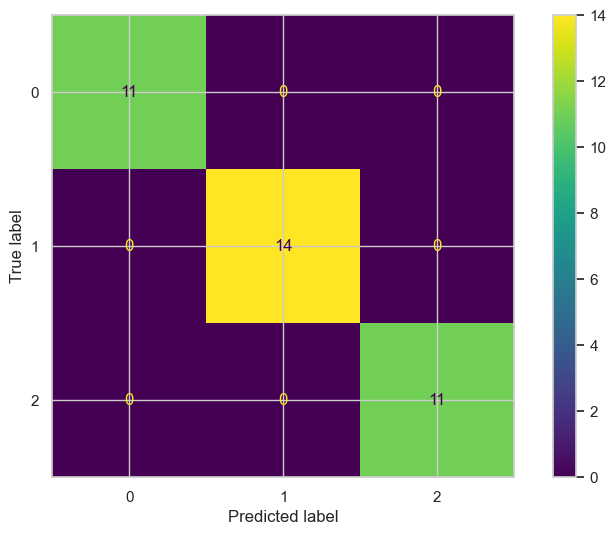

In [267]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = final_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


The confusion matrix shows perfect classification performance on the test set:  
- All predictions fall exactly along the diagonal.
- No misclassifications were made.
- Each class was predicted correctly for **all its test instances** (Class 0: 11, Class 1: 14, Class 2: 11).

This strongly indicates that:
- The model generalizes well to unseen data.
- There is no indication of overfitting.
- The feature preprocessing and hyperparameter tuning steps contributed to robust performance.

The matrix visualization confirms the **macro-average F1 score of 1.0**, as reported in the classification report.